# Title : Analyzing Weather Data from OpenWeatherMap API

In [ ]:
import requests
import pandas as pd
import datetime

C:\Users\varun\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\varun\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\varun\AppData\Local\Temp/ipykernel_25080/1494585185.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# Set your OpenWeatherMap API key
api_key = '828479cfb63e4e12b7834e0949db418a'

In [ ]:
# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

In [ ]:
# https://openweathermap.org/api/one-call-3
# how	How to use api call
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [ ]:
# Send a GET request to the API
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

'broken clouds'

In [ ]:
# Getting the data from dictionary and taking into one variable
# Extract relevant weather attributes using list comprehension
temperatures = [item['main']['temp'] for item in weather_data['list']]

# It will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [ ]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({'Timestamp': timestamps,
                           'Temperature': temperatures,
                           'humidity': humidity,
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

In [ ]:
# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

Maximum Temperature - 305.48
Minimum Temperature - 294.01


In [ ]:
# Clean and preprocess the data # Handling missing values
weather_df.fillna(0, inplace=True) # Replace missing values with 0 or appropriate value

In [ ]:
# Handling inconsistent format (if applicable)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [ ]:
# Convert temperature from Kelvin to Celsius
# Print the cleaned and preprocessed data print(weather_df)
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-10-22 12:00:00        29.42        55        2.86       broken clouds
2024-10-22 15:00:00        28.30        60        2.40          light rain
2024-10-22 18:00:00        26.14        70        3.27          light rain
2024-10-22 21:00:00        24.48        77        3.85          light rain
2024-10-23 00:00:00        23.73        80        2.94          light rain
2024-10-23 03:00:00        25.80        69        2.45          light rain
2024-10-23 06:00:00        28.79        56        2.24    scattered clouds
2024-10-23 09:00:00        30.69        49        2.64    scattered clouds
2024-10-23 12:00:00        28.78        58        2.72       broken clouds
2024-10-23 15:00:00        27.39        63        3.47     overcast clouds
2024-10-23 18:00:00        26.13        68        3.99     overcast clouds
2024-10-23 21:00:00      

In [ ]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

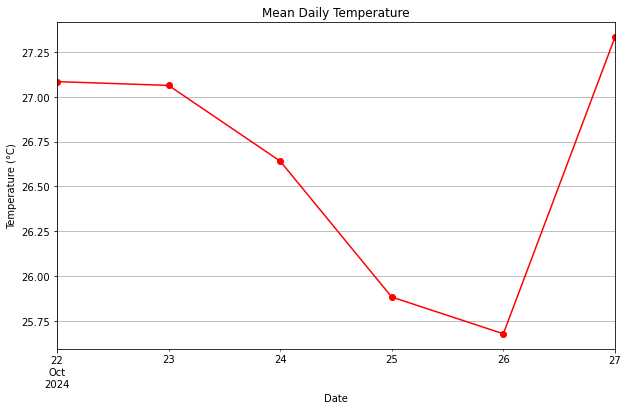

In [ ]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

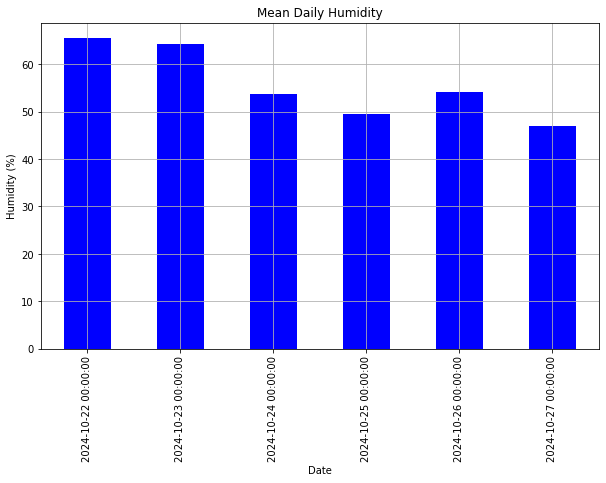

In [ ]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

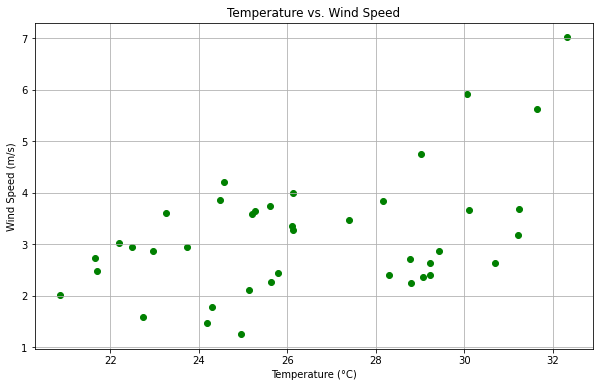

In [ ]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

C:\Users\varun\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


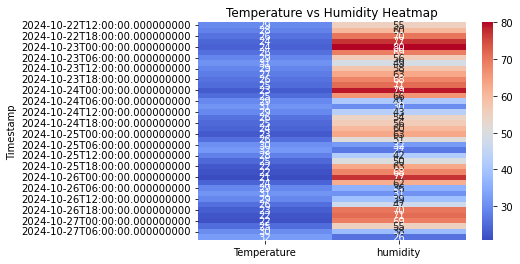

In [ ]:
# Heatmap
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

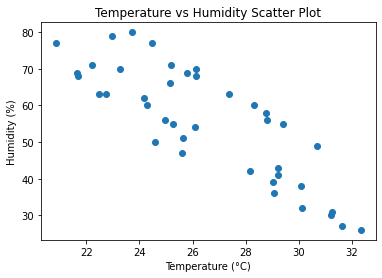

In [ ]:
# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()